1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ] [22.46 23.2  23.34 23.85 24.16 25.28 25.79 26.19 26.37 26.65 26.65 26.68
 26.73 26.75 26.76 27.93 28.09 28.79 29.75 30.19 32.97]


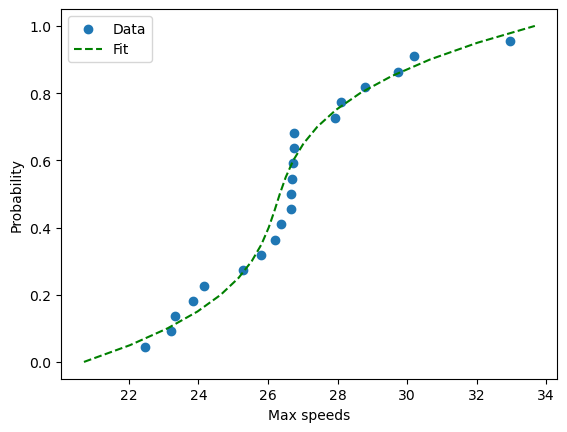

In [21]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import UnivariateSpline

max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

cprob = (np.arange(years_nb, dtype = np.float32) + 1) / (years_nb + 1) 
#calcolo la probabilità secondo la distribuzione cumulativa come visto 
#nella traccia 
sorted_max_speeds = np.sort(max_speeds)

quantile_func = UnivariateSpline(cprob, sorted_max_speeds)

nprob = np.linspace(0, 1, 21)
fitted_max_speeds = quantile_func(nprob)
print(nprob, sorted_max_speeds)
fifty_prob = 1. - 0.02
fifty_wind = quantile_func(fifty_prob)
fifty_wind

plt.scatter(sorted_max_speeds, cprob, label = 'Data')
plt.xlabel('Max speeds')
plt.plot(fitted_max_speeds, nprob, linestyle = '--', label = 'Fit', c = 'green')
plt.ylabel('Probability')
plt.legend()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

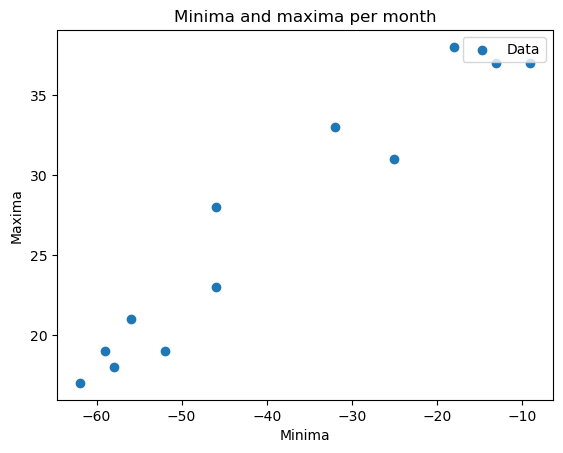

Shift with the orizontal axis:  -3.8464410741505 -4.274094341248227
Error on x shift:  0.09922571673354555
Error on y shift:  0.0723801362565375
0.026845580477008052


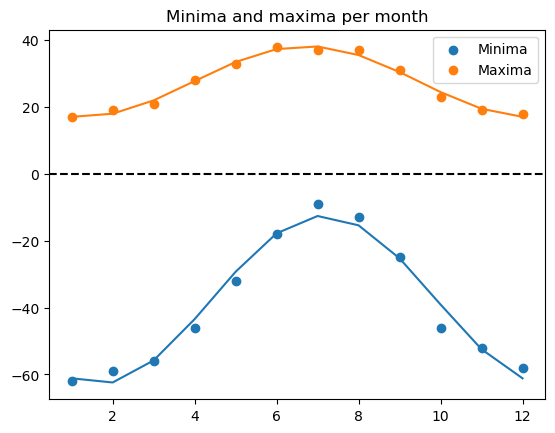

In [49]:
from scipy import optimize

MAX = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18] #le temperature stanno seguendo l'andamento stagionale 
MIN = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

sorted_v = [[x, y] for x, y in zip(MIN, MAX)]
sorted_v = sorted(sorted_v)

X = [sorted_v[i][0] for i in range(len(sorted_v))]
Y = [sorted_v[i][1] for i in range(len(sorted_v))]
months = [i for i in range(1, 13)]

plt.scatter(X, Y, label = 'Data')
plt.title('Minima and maxima per month')
plt.xlabel('Minima')
plt.ylabel('Maxima')

#def function(xi, a, c, d, e, x0):
 #   return a *(xi-x0)+ b * ((xi-x0) ** 2) + c * (xi-x0)** 3 + d * (xi-x0)**4 + e 

def sin(x, a, x0, y0):
    return a * np.cos((2 * np.pi)/11 * (x-x0) ) + y0


def guessed_params(t):
    absmax = abs(max(abs(np.max(t)), abs(np.min(t))))
    A = np.abs(absmax - abs(np.mean(t)))
    
    xshift = (((len(t) - 1)) / 4.0 ) - np.argmax(t)
    
    yshift = np.mean(t)
    
    return [A, xshift, yshift]

plt.legend()
plt.show()

paramsx, params_covx = optimize.curve_fit(sin, months, MIN, p0 = guessed_params(MIN))
paramsy, params_covy = optimize.curve_fit(sin, months, MAX , guessed_params(MAX))

plt.scatter(months, MIN, label = 'Minima')
plt.scatter(months, MAX, label = 'Maxima')

sinx = [sin(xi, paramsx[0], paramsx[1], paramsx[2]) for xi in months]
siny = [sin(yi, paramsy[0], paramsy[1], paramsy[2]) for yi in months]

plt.plot(months, sinx)
plt.plot(months, siny)

plt.axhline(y = 0, linestyle = '--', c = 'black')
plt.title('Minima and maxima per month')
plt.legend()

print('Shift with the orizontal axis: ', paramsx[1], paramsy[1])

print('Error on x shift: ', np.sqrt(params_covx[1][1]))
print('Error on y shift: ', np.sqrt(params_covy[1][1]))

np.abs(paramsx[1] - paramsy[1]) < np.abs(np.sqrt(params_covx[1][1]) - np.sqrt(params_covy[1][1]))

print(np.sqrt(params_covx[1][1]) - np.sqrt(params_covy[1][1]))

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


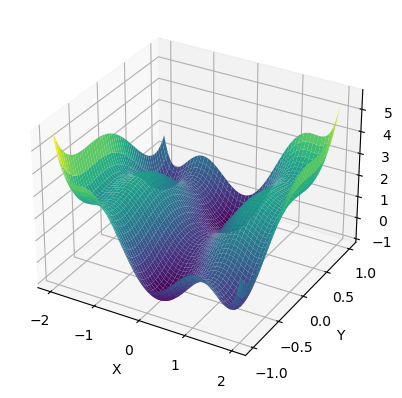

Global minimum found at:  [ 0.08984201 -0.7126564 ]
Function value at global minimum:  -1.031628453489877
Solution 2:  [-0.08984202  0.71265639]
Function value at global minimum:  -1.0316284534898756


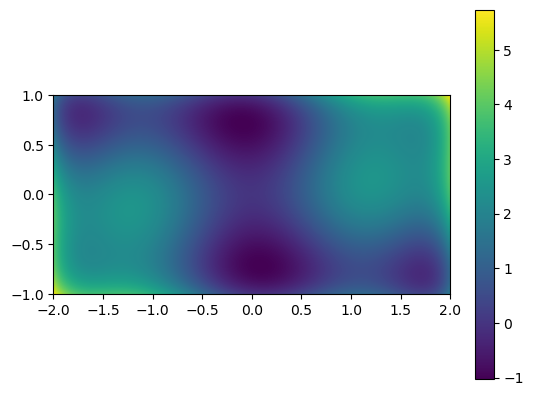

In [76]:
from scipy.optimize import minimize

N = 1000
x = np.linspace(-2, 2, N)
y = np.linspace(-1, 1, N)

def f(x):
    return (4 - 2.1 * x[0]**2 + x[0]**4/3)*x[0]**2 + x[0] * x[1] + (4*x[1]**2 - 4) * x[1] **2

X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, f([X, Y]), cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
z = f([X, Y])
plt.imshow(z,  cmap  ='viridis', origin = 'lower', extent = [x.min(), x.max(), y.min(), y.max()])
plt.colorbar()

solution =  minimize(f, [0,-0.7], bounds=[(-2, 2), (-1, 1)])
solution2 =  minimize(f, [0, 0.7], bounds=[(-2, 2), (-1, 1)])

print('Global minimum found at: ', solution.x)
print('Function value at global minimum: ', solution.fun)

print('Solution 2: ', solution2.x)
print('Function value at global minimum: ', solution2.fun)


4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

    # year     hare     lynx  carrot
0     1900  30000.0   4000.0   48300
1     1901  47200.0   6100.0   48200
2     1902  70200.0   9800.0   41500
3     1903  77400.0  35200.0   38200
4     1904  36300.0  59400.0   40600
5     1905  20600.0  41700.0   39800
6     1906  18100.0  19000.0   38600
7     1907  21400.0  13000.0   42300
8     1908  22000.0   8300.0   44500
9     1909  25400.0   9100.0   42100
10    1910  27100.0   7400.0   46000
11    1911  40300.0   8000.0   46800
12    1912  57000.0  12300.0   43800
13    1913  76600.0  19500.0   40900
14    1914  52300.0  45700.0   39400
15    1915  19500.0  51100.0   39000
16    1916  11200.0  29700.0   36700
17    1917   7600.0  15800.0   41800
18    1918  14600.0   9700.0   43300
19    1919  16200.0  10100.0   41300
20    1920  24700.0   8600.0   47300


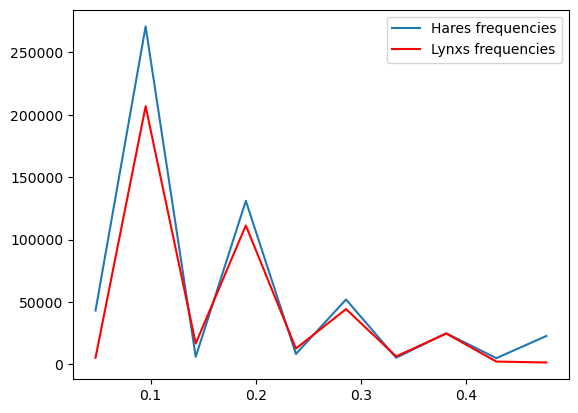

"\nplt.subplot(2, 2, 3)\nplt.plot(year, hares_ifft)\nplt.title('Frequencies hares')\n\nplt.subplot(2, 2, 4)\nplt.plot(year, lynxs_ifft)\nplt.title('Frequencies lynxs')\n"

In [101]:
import pandas as pd
from scipy import fftpack 

df  = pd.read_csv('populations.txt', delimiter = '\t')
print(df)
def get_frequency(data):
    fourier_transf = fftpack.fft(data)
    power = np.abs(fourier_transf)
    freq = fftpack.fftfreq(fourier_transf.size, d = 1)
    power = power[freq > 0] 
    freq = freq[freq > 0]  
    
    return freq, power

hares = df['hare']
lynxs = df['lynx']
year = df['# year']

hares_array = hares.to_numpy()
lynxs_array = lynxs.to_numpy()

hares_freq, hares_power = get_frequency(hares_array)

plt.plot(hares_freq, hares_power, label = 'Hares frequencies')


lynxs_freq, lynxs_power = get_frequency(lynxs_array)
plt.plot(lynxs_freq, lynxs_power, c = 'red', label = 'Lynxs frequencies')

plt.legend()
plt.show()

'''
plt.subplot(2, 2, 3)
plt.plot(year, hares_ifft)
plt.title('Frequencies hares')

plt.subplot(2, 2, 4)
plt.plot(year, lynxs_ifft)
plt.title('Frequencies lynxs')
'''


5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

Text(0.5, 1.0, 'Original image')

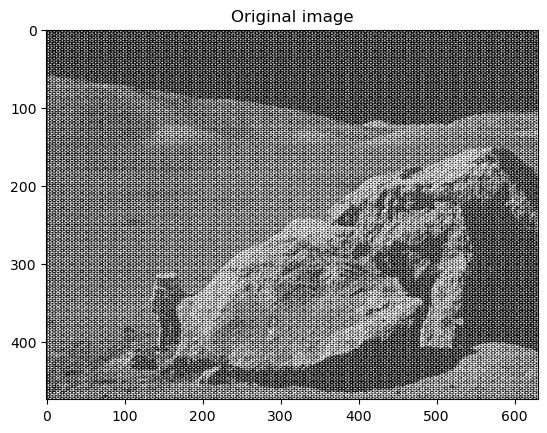

In [34]:
image = plt.imread('moonlanding.png')
plt.imshow(image, cmap = 'gray')
plt.title('Original image')

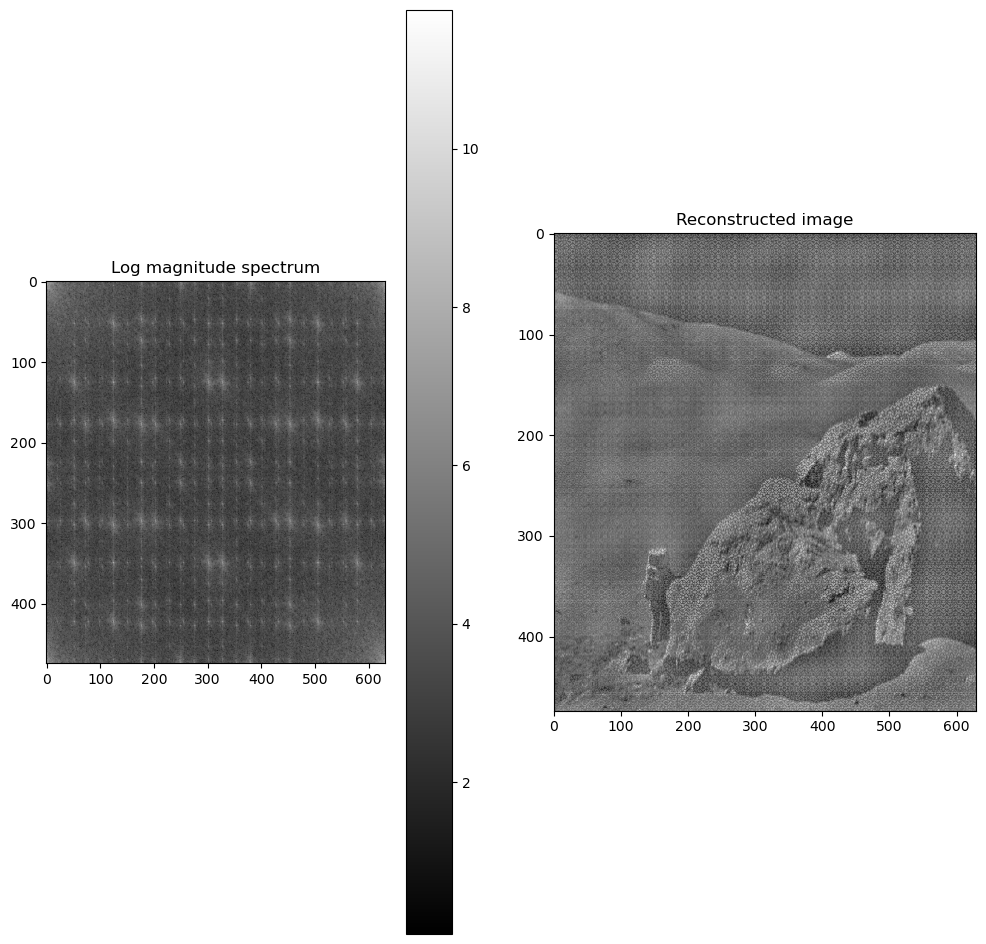

In [36]:
from scipy.fftpack import fft2, fftshift, ifft2

fft_image = fft2(image)
#fft_image_shifted = fftshift(fft_image)
magnitude_spectrum = np.abs(fft_image)

plt.figure(figsize= (12,12))
plt.subplot(121)
plt.imshow(np.log1p(magnitude_spectrum), cmap = 'gray', aspect = 1.5) #usiamo log1p per visualizzazione migliore
plt.title('Log magnitude spectrum')
plt.colorbar()

threshold = 0.01 * magnitude_spectrum.max()

fft_image[magnitude_spectrum > threshold] = 0

plt.subplot(122)
image2 = ifft2((fft_image)).real #inverse fourier transform
plt.title('Reconstructed image')
plt.imshow(image2, aspect = 1.5, cmap = 'gray')
